In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

In [4]:
data_serial = pd.read_csv('serial_time.txt')
data_serial_rand = pd.read_csv('serial_time_rand.txt')
data_parallel = pd.read_csv('parallel_time.txt')

In [5]:
# data_parallel.drop(columns='Unnamed: 3',inplace=True)
data_serial.drop(columns='Unnamed: 2',inplace=True)
data_serial_rand.drop(columns='Unnamed: 2',inplace=True)

In [6]:
data_serial_mean = data_serial.groupby('problema',as_index=False)['tempo_serial'].mean()
data_serial_mean

,problema,tempo_serial
0,1440,35.5
1,1600,47.2
2,1800,72.4
3,2080,122.8


In [8]:
data_serial_mean_rand = data_serial_rand.groupby('problema',as_index=False)['tempo_serial_rand'].mean()
data_serial_mean_randb

,problema,tempo_serial_rand
0,1440,36.3
1,1600,51.6
2,1800,79.8
3,2080,135.5


In [9]:
pd.merge(left=data_serial_mean,right=data_serial_mean_rand, suffixes=('','_rand'))

,problema,tempo_serial,tempo_serial_rand
0,1440,35.5,36.3
1,1600,47.2,51.6
2,1800,72.4,79.8
3,2080,122.8,135.5


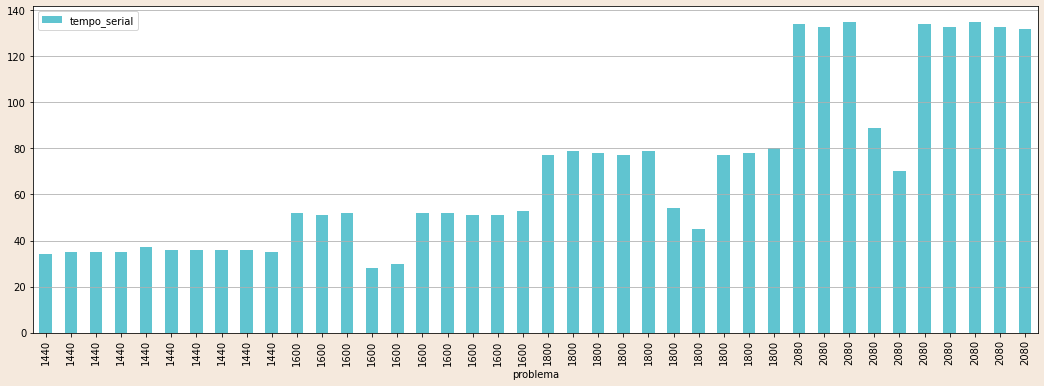

In [10]:
# data_serial.set_index('problema').plot(kind='bar')
fig, ax = plt.subplots(ncols=1,figsize=(18,6))
ax_twinx = []
fig.set_facecolor('#f5e9dd')
data = data_serial.set_index('problema')
data.plot(kind='bar', ax=ax,color='#60c4d0')
ax.yaxis.grid(True)

plt.savefig('serial_tempo_bar.png')
plt.show()

In [12]:
data_parallel.head()

,problema,tempo_paralelo,core
0,1440,9,4
1,1440,7,4
2,1440,8,4
3,1440,8,4
4,1440,7,4


In [13]:
data_parallel_mean = data_parallel.groupby(['core','problema'], as_index=False)['tempo_paralelo'].mean()
data_parallel_mean

,core,problema,tempo_paralelo
0,4,1440,8.0
1,4,1600,9.1
2,4,1800,13.7
3,4,2080,23.7
4,8,1440,4.2
5,8,1600,5.5
6,8,1800,8.5
7,8,2080,13.9
8,16,1440,2.2
9,16,1600,2.7


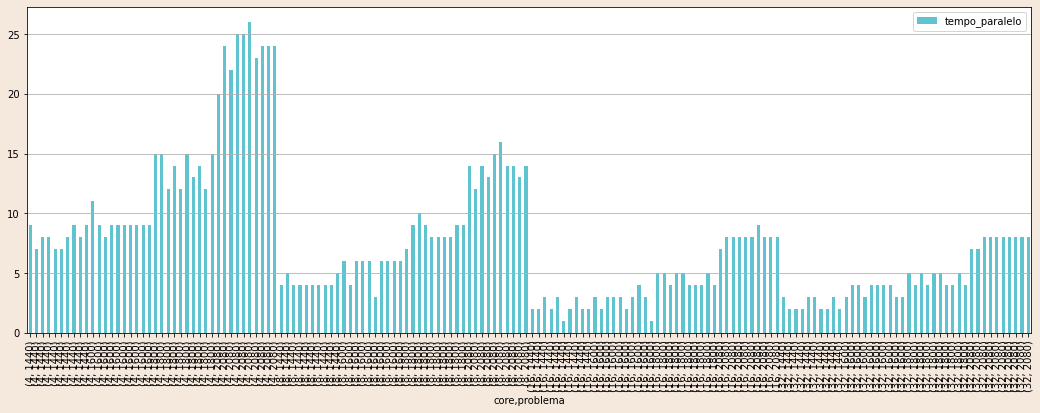

In [14]:
# data_parallel.set_index(['cores','problema']).plot(figsize=(15,5),kind='bar')
fig, ax = plt.subplots(ncols=1,figsize=(18,6))
ax_twinx = []
fig.set_facecolor('#f5e9dd')
data = data_parallel.set_index(['core','problema'])
data.plot(kind='bar', ax=ax,color='#60c4d0')
ax.yaxis.grid(True)

plt.savefig('paralelo_tempos_bar.png')
plt.show()

In [16]:
data_parallel_mean['tempo_serial']=[*data_serial_mean.tempo_serial.values,*data_serial_mean.tempo_serial.values,*data_serial_mean.tempo_serial.values,*data_serial_mean.tempo_serial.values]

In [18]:
 data_parallel_mean['speedup']= data_parallel_mean['tempo_serial'] / data_parallel_mean['tempo_paralelo'] 
 data_parallel_mean['eficiencia'] = data_parallel_mean['speedup']  / data_parallel_mean['core'] 

In [19]:
data_parallel_mean

,core,problema,tempo_paralelo,tempo_serial,speedup,eficiencia
0,4,1440,8.0,35.5,4.437500,1.109375
1,4,1600,9.1,47.2,5.186813,1.296703
2,4,1800,13.7,72.4,5.284672,1.321168
3,4,2080,23.7,122.8,5.181435,1.295359
4,8,1440,4.2,35.5,8.452381,1.056548
5,8,1600,5.5,47.2,8.581818,1.072727
6,8,1800,8.5,72.4,8.517647,1.064706
7,8,2080,13.9,122.8,8.834532,1.104317
8,16,1440,2.2,35.5,16.136364,1.008523
9,16,1600,2.7,47.2,17.481481,1.092593


In [20]:
fig =  ff.create_table(data_parallel_mean[1:])
fig.update_layout(
    autosize=True,
    
)
# fig.write_image("table_plotly.png", scale=2)
fig.show()

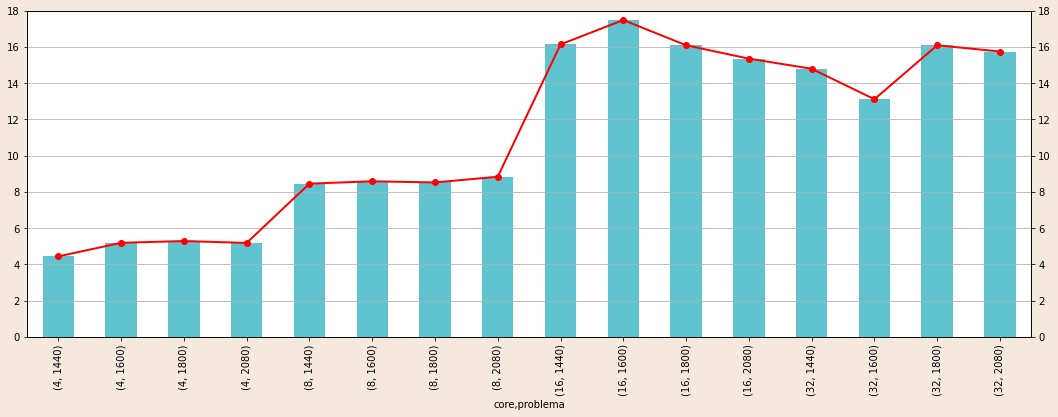

In [23]:
fig, ax = plt.subplots(ncols=1,figsize=(18,6))
ax_twinx = []
fig.set_facecolor('#f5e9dd')
data = data_parallel_mean.set_index(['core','problema'])['speedup']
data.plot(kind='bar', ax=ax,color='#60c4d0')
ax.yaxis.grid(True)
ax_twinx = ax.twinx()
ax_twinx.plot(ax.get_xticks(),data.values,linestyle='-', marker='o', linewidth=2.0, color='red')
ax_twinx.set_ylim(0,18)
ax.set_ylim(0,18)


plt.savefig('speedup.png')
plt.show()

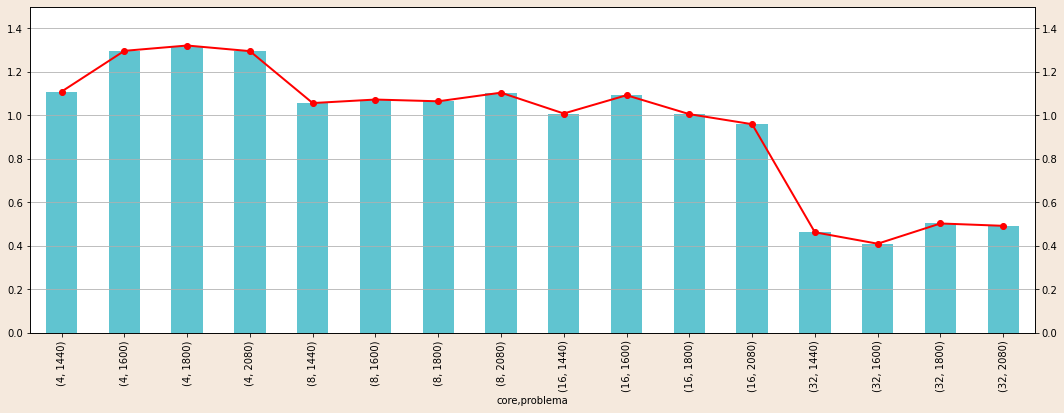

In [26]:
fig, ax = plt.subplots(ncols=1,figsize=(18,6))
ax_twinx = []
fig.set_facecolor('#f5e9dd')
data = data_parallel_mean.set_index(['core','problema'])['eficiencia']
data.plot(kind='bar', ax=ax,color='#60c4d0')
ax.yaxis.grid(True)
ax_twinx = ax.twinx()
ax_twinx.plot(ax.get_xticks(),data.values,linestyle='-', marker='o', linewidth=2.0, color='red')
ax_twinx.set_ylim(0,1.5)
ax.set_ylim(0,1.5)


plt.savefig('eficiencia.png')
plt.show()